<a href="https://colab.research.google.com/github/sbs87/colab/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression
## Install TF 2.0

In [1]:
!pip install -q tensorflow==2.0.0-beta

     |████████████████████████████████| 87.9MB 66kB/s 
     |████████████████████████████████| 3.1MB 47.1MB/s 
     |████████████████████████████████| 501kB 41.4MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 


## Import packages

In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Get & Load data

In [6]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-11-25 19:11:48--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-11-25 19:11:48 (31.6 MB/s) - ‘moore.csv’ saved [2302/2302]



In [16]:
!ls
!head moore.csv

moore.csv  sample_data
1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [ ]:
data = pd.read_csv("moore.csv",header=None).values
data

## Format & transform data

*   convert to log scale
*   x-center



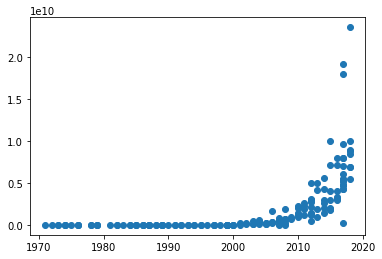

In [32]:
x_data=data[:,0].reshape(-1,1)
y_data=data[:,1]
plt.scatter(x_data,y_data)

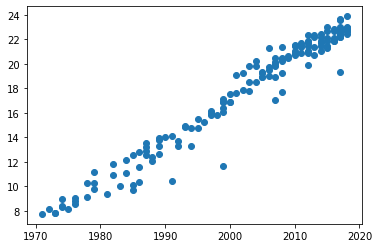

In [35]:
y_data_log=np.log(y_data)
plt.scatter(x_data,y_data_log)

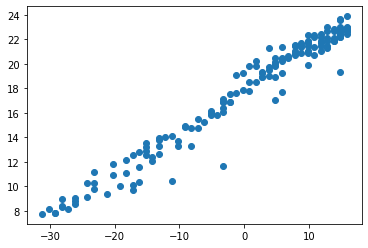

In [46]:
x=x_data-x_data.mean()
y=y_data_log
plt.scatter(x,y)

## Build and compile model

In [48]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(1,)),
                     tf.keras.layers.Dense(1)])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')

## What happens at different learning rates?

In [55]:
def schedule(epoch,lr):
  if epoch<50:
    return 0.0001
  return 0.001

schedule(100,2)

scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)
scheduler

## Fit model, evaluate

In [58]:
r=model.fit(x,y,epochs=200,callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 471us/sample - loss: 500.4601
Epoch 2/200
162/162 [==============================] - 0s 74us/sample - loss: 330.6059
Epoch 3/200
162/162 [==============================] - 0s 78us/sample - loss: 333.8697
Epoch 4/200
162/162 [==============================] - 0s 74us/sample - loss: 317.7044
Epoch 5/200
162/162 [==============================] - 0s 77us/sample - loss: 294.6202
Epoch 6/200
162/162 [==============================] - 0s 99us/sample - loss: 288.7101
Epoch 7/200
162/162 [==============================] - 0s 78us/sample - loss: 280.4622
Epoch 8/200
162/162 [==============================] - 0s 88us/sample - loss: 276.1654
Epoch 9/200
162/162 [==============================] - 0s 94us/sample - loss: 270.6713
Epoch 10/200
162/162 [==============================] - 0s 93us/sample - loss: 263.3634
Epoch 11/200
162/162 [==============================] - 0s 81us/sample - loss: 254.9692
Epoch 12/200
162/16

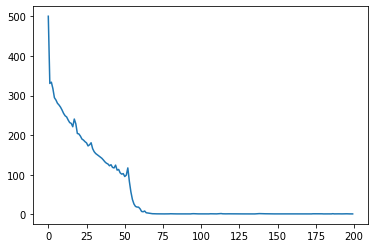

In [66]:
plt.plot(r.history['loss'],label='loss vs epoch')


In [67]:
type(r)


tensorflow.python.keras.callbacks.History

In [108]:
## How would I know which layer corresponse to dense? 
## It seems like layers[0] and ommitting it yeilds same results

#model.get_weights()
print(model.layers)
print(model.layers[0].get_weights())
slope=model.layers[0].get_weights()[0][0,0] # wow this is dangerous. IS there a better way to do this in python? Should be labeled. 
print(slope)
b=model.get_weights()[1][0]
print(b)

[array([[0.35212398]], dtype=float32), array([17.788208], dtype=float32)]
0.35212398
17.788208


In [90]:
# time to double
np.log(2)/slope

1.9684748221876687

## "Predict" i.e., plot fit line with actual values

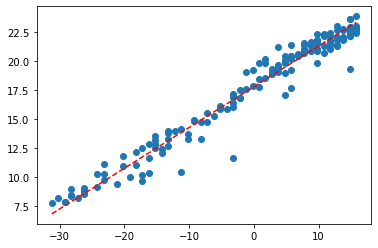

In [115]:
predicted=x*slope+b
plt.scatter(x,y)
plt.plot(x,predicted,'r--')
